<a href="https://colab.research.google.com/github/surisettimanjula/climate-change-analysis/blob/main/climate_change_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONNECTING TO GOOGLE CLOUD**

In [1]:
from google.colab import auth
auth.authenticate_user()
print("Authentication successful!")


Authentication successful!


In [2]:
from google.cloud import storage

client = storage.Client()
bucket_name = "climate-data-storage"
bucket = client.bucket(bucket_name)

print(f"✅ Connected to Google Cloud Storage: {bucket_name}")


✅ Connected to Google Cloud Storage: climate-data-storage


In [3]:
blobs = bucket.list_blobs()
for blob in blobs:
    print(blob.name)


GLB.Ts+dSST.csv
Sea_Level_Rise_Datasets_2022/SLR_TF U.S. Extreme Water Levels_1-degree-grids.csv
Sea_Level_Rise_Datasets_2022/SLR_TF U.S. Extreme Water Levels_Final-tide-gauges.csv
Sea_Level_Rise_Datasets_2022/SLR_TF U.S. Sea Level Projections.csv
StormEvents_locations-ftp_v1.0_d2024_c20250122.csv.gz
owid-co2-data.csv
tree-cover-loss/readme.md
tree-cover-loss/tree-cover-loss.csv
tree-cover-loss/tree-cover-loss.metadata.json


**Global Temperature Data (NASA GISTEMP)**

In [4]:
file_name = "GLB.Ts+dSST.csv"
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

import pandas as pd
df_temp = pd.read_csv(file_name, skiprows=1)
df_temp.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.21,-0.11,-0.16,-0.23,-0.23,-0.19,-0.18,***,***,-0.12,-0.18,-0.21
1,1881,-0.20,-0.16,0.02,0.03,0.06,-0.19,0.00,-0.05,-0.16,-0.22,-0.19,-0.08,-0.10,-.11,-.18,0.04,-0.08,-0.19
2,1882,0.15,0.13,0.04,-0.17,-0.14,-0.23,-0.17,-0.08,-0.15,-0.24,-0.17,-0.37,-0.12,-.09,.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.15,-0.23,-0.12,-0.24,-0.12,-0.18,-.20,-.35,-0.17,-0.10,-0.20
4,1884,-0.13,-0.09,-0.37,-0.41,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29,-.27,-.11,-0.37,-0.32,-0.29


**CO₂ Emissions Data (Our World in Data)**

In [5]:
file_name = "owid-co2-data.csv"
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

df_co2 = pd.read_csv(file_name)
df_co2.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Deforestation Data (Global Forest Watch)**

In [11]:
file_name = "tree-cover-loss_tree-cover-loss.csv"
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

df_deforestation = pd.read_csv(file_name)
df_deforestation.head()


,Entity,Code,Year,Total tree cover loss
0,Afghanistan,AFG,2001,88.09271
1,Afghanistan,AFG,2002,178.64037
2,Afghanistan,AFG,2003,244.33626
3,Afghanistan,AFG,2004,201.44495
4,Afghanistan,AFG,2005,235.95683


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total tree cover loss'].plot(kind='hist', bins=20, title='Total tree cover loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Year', y='Total tree cover loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total tree cover loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total tree cover loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Total tree cover loss'].plot(kind='line', figsize=(8, 4), title='Total tree cover loss')
plt.gca().spines[['top', 'right']].set_visible(False)

**Sea Level Rise Data (NOAA)**

In [12]:
file_name = "Sea_Level_Rise_Datasets_2022_SLR_TF U.S. Sea Level Projections.csv"
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

df_sea_level = pd.read_csv(file_name)
df_sea_level.head()


<ipython-input-12-60ceaabdca2e>:5: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(file_name)


,"Mean Sea Level Dataset for ""Global and Regional Sea Level Rise Scenarios for the United States: Updated Mean Projections and Extreme Water Level Probabilities Along U.S. Coastlines""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sweet, W.V., B.D. Hamlington, R.E. Kopp, C.P. ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Global and Regional Sea Level Rise Scenarios f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://oceanservice.noaa.gov/hazards/sealevel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Mean Sea Level Dataset for "Global and Regional Sea Level Rise Scenarios for the United States: Updated Mean Projections and Extreme Water Level Probabilities Along U.S. Coastlines"').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Extreme Weather Events Data (NOAA)**

In [13]:
import gzip

file_name = "StormEvents_locations-ftp_v1.0_d2024_c20250122.csv.gz"
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

with gzip.open(file_name, 'rt') as f:
    df_weather = pd.read_csv(f)

df_weather.head()


,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,202404,188809,1161227,1,0.90,SW,HAPPY TOWN,33.9900,-81.090,3359400,815400
1,202404,188809,1161228,1,0.00,N,COLUMBIA,34.0000,-81.020,3400,811200
2,202404,188809,1161229,1,0.57,E,COLUMBIA,34.0000,-81.010,3400,81600
3,202404,188809,1161230,1,0.96,S,BALLTOWN,33.5661,-81.730,3333966,8143800
4,202404,188809,1161231,1,0.62,N,COLUMBIA,34.0090,-81.021,34540,811260


In [14]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_weather)

https://docs.google.com/spreadsheets/d/15lEh0O_SbWw-z8TmpUqJTjsAQNMcGGrI0-cQ1qyvkLo#gid=0


**Visualizing Climate Change Trends**

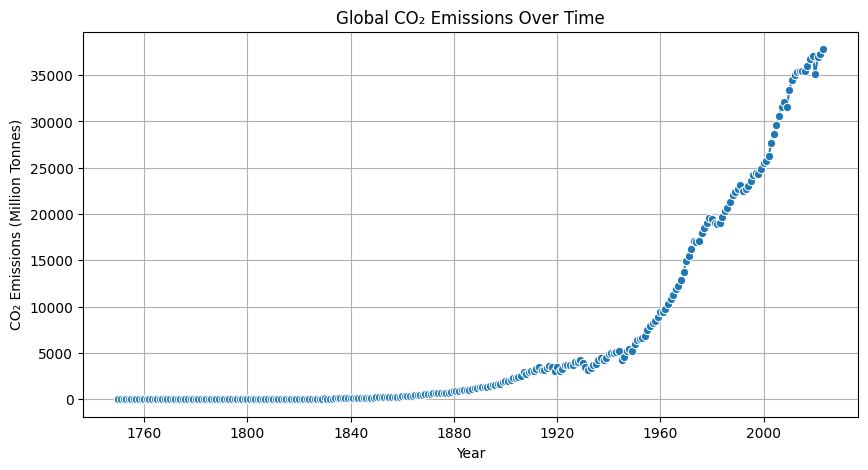

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_co2['year'] = pd.to_datetime(df_co2['year'], format='%Y')

df_global = df_co2[df_co2['country'] == 'World']

plt.figure(figsize=(10,5))
sns.lineplot(x=df_global['year'], y=df_global['co2'], marker="o")
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.grid()
plt.show()


# Data Cleaning & Preprocessing

Load Datasets from Google Cloud Storage

In [18]:
from google.colab import auth
from google.cloud import storage
import pandas as pd
auth.authenticate_user()

client = storage.Client()
bucket_name = "climate-data-storage"
bucket = client.bucket(bucket_name)

datasets = {
    "temperature": "GLB.Ts+dSST.csv",
    "co2": "owid-co2-data.csv",
    "deforestation": "tree-cover-loss_tree-cover-loss.csv",
    "sea_level": "Sea_Level_Rise_Datasets_2022_SLR_TF U.S. Sea Level Projections.csv",
    "weather_events": "StormEvents_locations-ftp_v1.0_d2024_c20250122.csv.gz"
}

def load_csv_from_gcs(file_name):
    blob = bucket.blob(file_name)
    blob.download_to_filename(file_name)
    return pd.read_csv(file_name)
df_temp = load_csv_from_gcs(datasets["temperature"])
df_co2 = load_csv_from_gcs(datasets["co2"])
df_deforestation = load_csv_from_gcs(datasets["deforestation"])
df_sea_level = load_csv_from_gcs(datasets["sea_level"])

import gzip
blob = bucket.blob(datasets["weather_events"])
blob.download_to_filename(datasets["weather_events"])

with gzip.open(datasets["weather_events"], 'rt') as f:
    df_weather = pd.read_csv(f)

print("✅ All datasets successfully loaded!")


<ipython-input-18-27cd73d690a0>:21: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_name)


✅ All datasets successfully loaded!


# Handling missing values

In [19]:

print("Missing values in Temperature Data:")
print(df_temp.isnull().sum())

print("\nMissing values in CO₂ Data:")
print(df_co2.isnull().sum())

print("\nMissing values in Deforestation Data:")
print(df_deforestation.isnull().sum())

print("\nMissing values in Sea Level Data:")
print(df_sea_level.isnull().sum())

print("\nMissing values in Weather Events Data:")
print(df_weather.isnull().sum())



Missing values in Temperature Data:
Land-Ocean: Global Means    0
dtype: int64

Missing values in CO₂ Data:
country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64

Missing values in Deforestation Data:
Entity                     0
Code                     230
Year                       0
Total tree cover loss      0
dtype: int64

Missing values in Sea Level Data:
Mean Sea Level Dataset for "Global and Regional Sea Level Rise Scenarios for the United States: Updated Mean Projections and Extreme Water Level Probabilities Along U.S. Coastlines"        6
Unnamed: 1                                                        

In [24]:
columns_to_drop = ["trade_co2", "trade_co2_share"]
existing_columns = df_co2.columns

columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:
    df_co2.drop(columns=columns_to_drop, inplace=True)
else:
    print("Warning: The specified columns to drop were not found in the DataFrame.")


In [25]:
print(df_co2.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [26]:
columns_to_drop = ["trade_co2", "trade_co2_share"]

# Check if the columns exist before dropping
df_co2 = df_co2.drop(columns=[col for col in columns_to_drop if col in df_co2.columns], errors='ignore')

print("✅ Columns dropped successfully!")


✅ Columns dropped successfully!


In [27]:
df_co2.fillna({"gdp": df_co2["gdp"].median(), "population": df_co2["population"].median()}, inplace=True)
df_sea_level.fillna(method="ffill", inplace=True)
df_deforestation.fillna(method="ffill", inplace=True)

df_co2.dropna(inplace=True)
df_sea_level.dropna(inplace=True)
df_deforestation.dropna(inplace=True)

print("✅ Missing values after cleaning:")
print(df_co2.isnull().sum().sum(), "missing in CO₂ dataset")
print(df_sea_level.isnull().sum().sum(), "missing in Sea Level dataset")
print(df_deforestation.isnull().sum().sum(), "missing in Deforestation dataset")


✅ Missing values after cleaning:
0 missing in CO₂ dataset
0 missing in Sea Level dataset
0 missing in Deforestation dataset


<ipython-input-27-4963e71c0b86>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea_level.fillna(method="ffill", inplace=True)
<ipython-input-27-4963e71c0b86>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_deforestation.fillna(method="ffill", inplace=True)


#  Data Analysis & Visualization

Statistical Analysis (Mean, Correlation, Trends)

**Temperature Data Analysis 🌡️**

In [34]:
import pandas as pd

# Load the temperature dataset from Google Cloud Storage (GCS)
file_path = "/content/GLB.Ts+dSST.csv"  # Update with correct path
df_temperature = pd.read_csv(file_path)

# Display first few rows to check
print(df_temperature.head())


                                                                                          Land-Ocean: Global Means
Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                       SON
1880 -.20 -.26 -.09 -.17 -.10 -.22 -.21 -.11 -.16 -.23 -.23 -.19 -.18 ***  ***  -.12 -.18                     -.21
1881 -.20 -.16 .02  .03  .06  -.19 .00  -.05 -.16 -.22 -.19 -.08 -.10 -.11 -.18 .04  -.08                     -.19
1882 .15  .13  .04  -.17 -.14 -.23 -.17 -.08 -.15 -.24 -.17 -.37 -.12 -.09 .07  -.09 -.16                     -.19
1883 -.30 -.37 -.13 -.19 -.18 -.08 -.08 -.15 -.23 -.12 -.24 -.12 -.18 -.20 -.35 -.17 -.10                     -.20


In [35]:
print(df_temperature.columns)


Index(['Land-Ocean: Global Means'], dtype='object')


In [36]:
print("🌍 Global Temperature Statistics:")
print(df_temperature.describe())


🌍 Global Temperature Statistics:
       Land-Ocean: Global Means
count                       146
unique                       86
top                        -.29
freq                          6


In [4]:
%whos


Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [6]:
import pandas as pd

gcs_path_temperature = "gs://climate-data-storage/GLB.Ts+dSST.csv"


df_temperature = pd.read_csv(gcs_path_temperature)

print(df_temperature.head())


                                                                                          Land-Ocean: Global Means
Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                       SON
1880 -.20 -.26 -.09 -.17 -.10 -.22 -.21 -.11 -.16 -.23 -.23 -.19 -.18 ***  ***  -.12 -.18                     -.21
1881 -.20 -.16 .02  .03  .06  -.19 .00  -.05 -.16 -.22 -.19 -.08 -.10 -.11 -.18 .04  -.08                     -.19
1882 .15  .13  .04  -.17 -.14 -.23 -.17 -.08 -.15 -.24 -.17 -.37 -.12 -.09 .07  -.09 -.16                     -.19
1883 -.30 -.37 -.13 -.19 -.18 -.08 -.08 -.15 -.23 -.12 -.24 -.12 -.18 -.20 -.35 -.17 -.10                     -.20


In [7]:
print(df_temperature.columns)


Index(['Land-Ocean: Global Means'], dtype='object')


In [8]:
print(df_temperature.head())


                                                                                          Land-Ocean: Global Means
Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                       SON
1880 -.20 -.26 -.09 -.17 -.10 -.22 -.21 -.11 -.16 -.23 -.23 -.19 -.18 ***  ***  -.12 -.18                     -.21
1881 -.20 -.16 .02  .03  .06  -.19 .00  -.05 -.16 -.22 -.19 -.08 -.10 -.11 -.18 .04  -.08                     -.19
1882 .15  .13  .04  -.17 -.14 -.23 -.17 -.08 -.15 -.24 -.17 -.37 -.12 -.09 .07  -.09 -.16                     -.19
1883 -.30 -.37 -.13 -.19 -.18 -.08 -.08 -.15 -.23 -.12 -.24 -.12 -.18 -.20 -.35 -.17 -.10                     -.20


In [9]:
df_temperature = pd.read_csv(gcs_path_temperature, skiprows=1)
print(df_temperature.head())


   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.20 -0.26 -0.09 -0.17 -0.10 -0.22 -0.21 -0.11 -0.16 -0.23 -0.23   
1  1881 -0.20 -0.16  0.02  0.03  0.06 -0.19  0.00 -0.05 -0.16 -0.22 -0.19   
2  1882  0.15  0.13  0.04 -0.17 -0.14 -0.23 -0.17 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.15 -0.23 -0.12 -0.24   
4  1884 -0.13 -0.09 -0.37 -0.41 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.19 -0.18   ***   *** -0.12 -0.18 -0.21  
1 -0.08 -0.10  -.11  -.18  0.04 -0.08 -0.19  
2 -0.37 -0.12  -.09   .07 -0.09 -0.16 -0.19  
3 -0.12 -0.18  -.20  -.35 -0.17 -0.10 -0.20  
4 -0.31 -0.29  -.27  -.11 -0.37 -0.32 -0.29  


In [12]:
import numpy as np


In [13]:
import numpy as np

df_temperature.replace("***", np.nan, inplace=True)
df_temperature.replace("-.--", np.nan, inplace=True)

df_temperature.iloc[:, 1:] = df_temperature.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

print(df_temperature.head())
print("\nMissing values in Temperature Data:")
print(df_temperature.isnull().sum())


   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.20 -0.26 -0.09 -0.17 -0.10 -0.22 -0.21 -0.11 -0.16 -0.23 -0.23   
1  1881 -0.20 -0.16  0.02  0.03  0.06 -0.19  0.00 -0.05 -0.16 -0.22 -0.19   
2  1882  0.15  0.13  0.04 -0.17 -0.14 -0.23 -0.17 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.15 -0.23 -0.12 -0.24   
4  1884 -0.13 -0.09 -0.37 -0.41 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.19 -0.18   NaN   NaN -0.12 -0.18 -0.21  
1 -0.08 -0.10 -0.11 -0.18  0.04 -0.08 -0.19  
2 -0.37 -0.12 -0.09  0.07 -0.09 -0.16 -0.19  
3 -0.12 -0.18  -0.2 -0.35 -0.17 -0.10 -0.20  
4 -0.31 -0.29 -0.27 -0.11 -0.37 -0.32 -0.29  

Missing values in Temperature Data:
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     1
DJF     1
MAM     0
JJA     0
SON     0
dtype: int64


In [14]:
df_temperature.drop_duplicates(subset="Year", keep="first", inplace=True)


In [15]:
df_temperature.to_csv("cleaned_temperature_data.csv", index=False)


Checking Duplicates

In [16]:

print("🔍 Checking for duplicate rows in Temperature Data...")
duplicates = df_temperature.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

if duplicates > 0:
    df_temperature.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("✅ No duplicate rows found.")


🔍 Checking for duplicate rows in Temperature Data...
Total duplicate rows: 0
✅ No duplicate rows found.


In [17]:
# Basic statistics for temperature data
print("🌍 Global Temperature Statistics:")
print(df_temperature.describe())


🌍 Global Temperature Statistics:
              Year         Jan         Feb         Mar         Apr  \
count   145.000000  145.000000  145.000000  145.000000  145.000000   
mean   1952.000000    0.068690    0.077172    0.094828    0.068690   
std      42.001984    0.434603    0.441759    0.446745    0.408954   
min    1880.000000   -0.810000   -0.630000   -0.630000   -0.600000   
25%    1916.000000   -0.250000   -0.240000   -0.230000   -0.250000   
50%    1952.000000   -0.010000   -0.040000    0.010000   -0.030000   
75%    1988.000000    0.320000    0.390000    0.320000    0.290000   
max    2024.000000    1.240000    1.440000    1.390000    1.310000   

              May         Jun         Jul         Aug         Sep         Oct  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.057862    0.045724    0.070276    0.068552    0.073793    0.099655   
std      0.389138    0.388585    0.370742    0.387203    0.388568    0.393634   
min     -0.5

Visualizing Temperature Trends Over Time

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


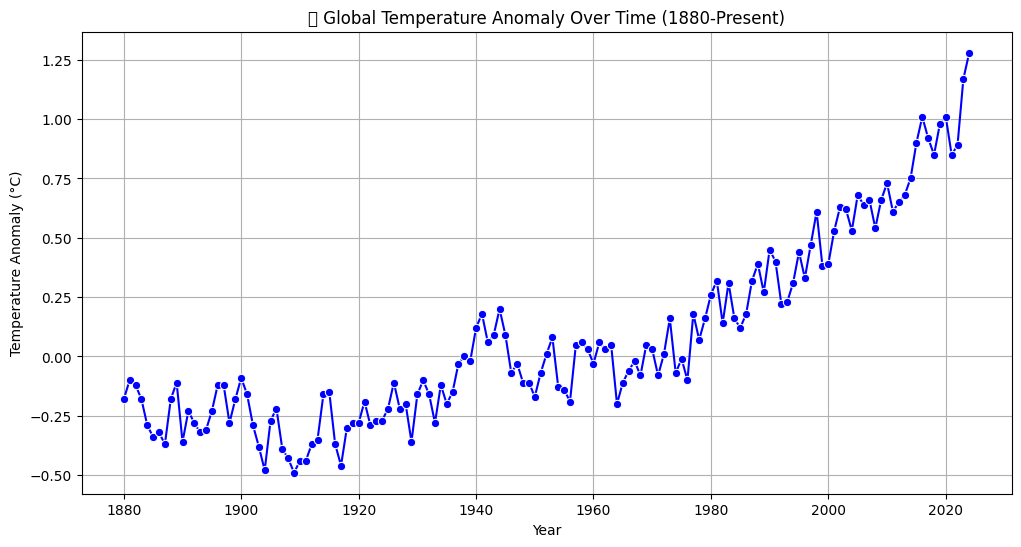

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df_temperature['Year'] = df_temperature['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_temperature['Year'], y=df_temperature['J-D'], marker="o", color="b")

plt.title("📈 Global Temperature Anomaly Over Time (1880-Present)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()


**Analyzing CO₂ Emissions Trends**

In [20]:
import pandas as pd
gcs_path_co2 = "gs://climate-data-storage/owid-co2-data.csv"

df_co2 = pd.read_csv(gcs_path_co2)

print(df_co2.head())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

**Column Names**

In [21]:
print(df_co2.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

**Proceed with Statistics**

In [22]:
print("🌍 CO₂ Emissions Statistics:")
print(df_co2.describe())


🌍 CO₂ Emissions Statistics:
               year    population           gdp    cement_co2  \
count  50191.000000  4.101900e+04  1.525100e+04  28863.000000   
mean    1919.883067  5.686141e+07  3.300495e+11      7.767746   
std       65.627296  3.199905e+08  3.086383e+12     62.595292   
min     1750.000000  2.150000e+02  4.998000e+07      0.000000   
25%     1875.000000  3.273130e+05  7.874038e+09      0.000000   
50%     1924.000000  2.289522e+06  2.743861e+10      0.000000   
75%     1974.000000  9.862459e+06  1.212627e+11      0.486000   
max     2023.000000  8.091735e+09  1.301126e+14   1696.308000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           25358.000000  29137.000000    26981.000000     26002.000000   
mean                0.059036    415.698178        6.208882        43.104462   
std                 0.120328   1945.843973       62.322553      1729.939596   
min                 0.000000      0.000000    -1977.750000      -100.0

**Handling Missing Values in CO₂ Data**

In [23]:

print("Missing values in CO₂ Data:")
print(df_co2.isnull().sum())

df_co2.fillna(df_co2.mean(numeric_only=True), inplace=True)

df_co2.dropna(axis=1, thresh=len(df_co2) * 0.5, inplace=True)

print("Missing values after handling:")
print(df_co2.isnull().sum())


Missing values in CO₂ Data:
country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64
Missing values after handling:
country                           0
year                              0
iso_code                       7929
population                        0
gdp                               0
                               ... 
temperature_change_from_n2o       0
total_ghg                         0
total_ghg_excluding_lucf          0
trade_co2                         0
trade_co2_share                   0
Length: 79, dtype: int64


**CO₂ Emissions Over Time**

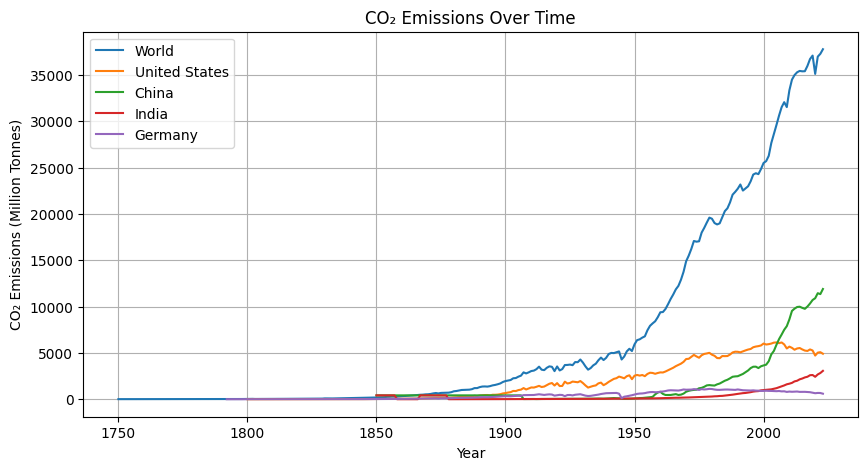

In [24]:
import matplotlib.pyplot as plt


countries = ["World", "United States", "China", "India", "Germany"]

df_co2_filtered = df_co2[df_co2["country"].isin(countries)]

plt.figure(figsize=(10, 5))
for country in countries:
    subset = df_co2_filtered[df_co2_filtered["country"] == country]
    plt.plot(subset["year"], subset["co2"], label=country)

plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.title("CO₂ Emissions Over Time")
plt.legend()
plt.grid()
plt.show()


**Handling Missing Values in Deforestation Data**

In [26]:
# Load Deforestation Data from Google Cloud Storage
gcs_path_deforestation = f"gs://climate-data-storage/tree-cover-loss/tree-cover-loss.csv"
df_deforestation = pd.read_csv(gcs_path_deforestation)

# Display first few rows to confirm
print(df_deforestation.head())


        Entity Code  Year  Total tree cover loss
0  Afghanistan  AFG  2001               88.09271
1  Afghanistan  AFG  2002              178.64037
2  Afghanistan  AFG  2003              244.33626
3  Afghanistan  AFG  2004              201.44495
4  Afghanistan  AFG  2005              235.95683


In [27]:
# Check for missing values
print("Missing values in Deforestation Data:")
print(df_deforestation.isnull().sum())

# Drop rows with missing 'Year' or 'Total tree cover loss' (since they are essential)
df_deforestation.dropna(subset=["Year", "Total tree cover loss"], inplace=True)

# Fill missing 'Code' values with 'Unknown'
df_deforestation["Code"].fillna("Unknown", inplace=True)

# Confirm changes
print("Missing values after handling:")
print(df_deforestation.isnull().sum())


Missing values in Deforestation Data:
Entity                     0
Code                     230
Year                       0
Total tree cover loss      0
dtype: int64
Missing values after handling:
Entity                   0
Code                     0
Year                     0
Total tree cover loss    0
dtype: int64


<ipython-input-27-7c779210f177>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_deforestation["Code"].fillna("Unknown", inplace=True)


**Analyzing Deforestation Trends Over Time**

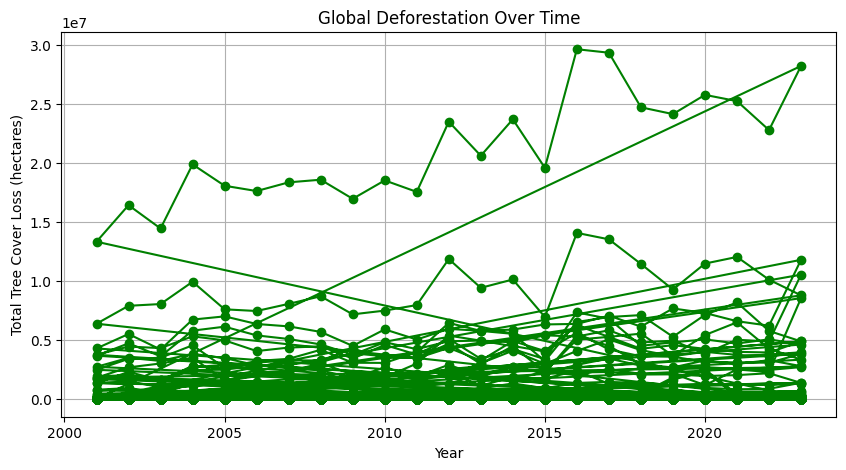

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df_deforestation["Year"], df_deforestation["Total tree cover loss"], marker="o", linestyle="-", color="green")

plt.xlabel("Year")
plt.ylabel("Total Tree Cover Loss (hectares)")
plt.title("Global Deforestation Over Time")
plt.grid()
plt.show()


**Identifying the Most Affected Regions**

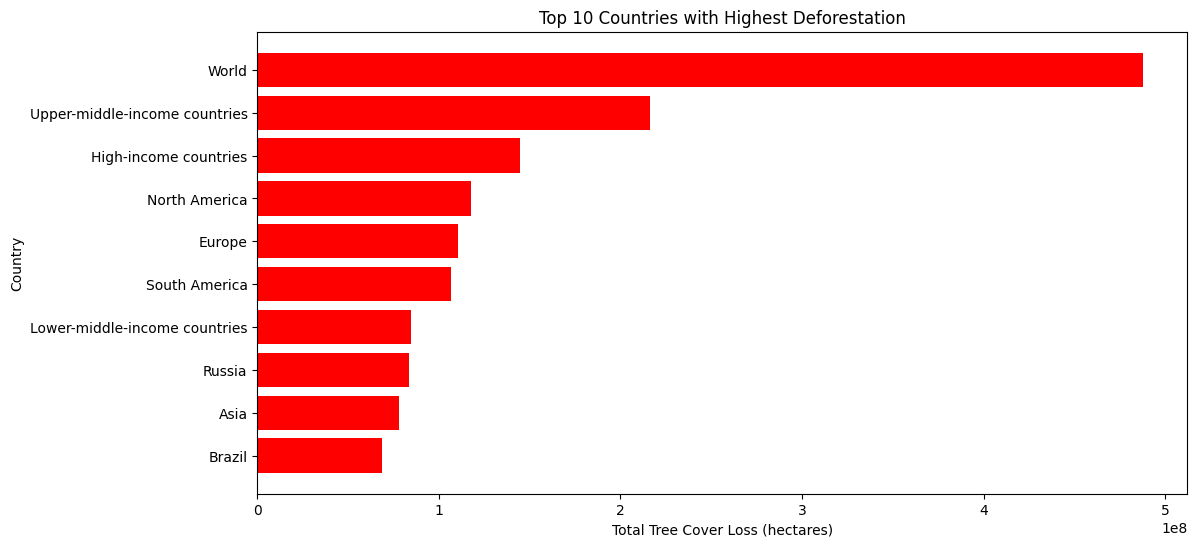

In [29]:

df_top_countries = df_deforestation.groupby("Entity")["Total tree cover loss"].sum().reset_index()

df_top_countries = df_top_countries.sort_values(by="Total tree cover loss", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(df_top_countries["Entity"], df_top_countries["Total tree cover loss"], color="red")
plt.xlabel("Total Tree Cover Loss (hectares)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Deforestation")
plt.gca().invert_yaxis()
plt.show()


**Sea level data**

In [38]:
bucket_name = "climate-data-storage"  # Replace with your actual bucket name
bucket_name = "climate-data-storage"  # Replace with your actual bucket name
file_name = "Sea_Level_Rise_Datasets_2022/SLR_TF U.S. Sea Level Projections.csv"  # Update based on your filename

gcs_path_sea_level = f"gs://{bucket_name}/{file_name}"

In [39]:
import pandas as pd

df_sea_level = pd.read_csv(gcs_path_sea_level)
print(df_sea_level.head())  # Preview first few rows


  Mean Sea Level Dataset for "Global and Regional Sea Level Rise Scenarios for the United States: Updated Mean Projections and Extreme Water Level Probabilities Along U.S. Coastlines"  \
0                                                NaN                                                                                                                                      
1                               Suggested Citation:                                                                                                                                       
2  Sweet, W.V., B.D. Hamlington, R.E. Kopp, C.P. ...                                                                                                                                      
3  Global and Regional Sea Level Rise Scenarios f...                                                                                                                                      
4  https://oceanservice.noaa.gov/hazards/sealevel...             

<ipython-input-39-dae668e1f3c5>:3: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level)


In [41]:
print(df_sea_level.columns)


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114', 'Unnamed: 115',
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119',
       'Unnamed: 120', 'Unnamed: 121'],
      dtype='object', length=122)


In [42]:
print("Missing values in Sea Level Data:")
print(df_sea_level.isnull().sum())


Missing values in Sea Level Data:
Unnamed: 0          5
Unnamed: 1         15
Unnamed: 2      15330
Unnamed: 3      15330
Unnamed: 4         30
                ...  
Unnamed: 117    17236
Unnamed: 118    17236
Unnamed: 119    17236
Unnamed: 120    17236
Unnamed: 121    17236
Length: 122, dtype: int64


In [43]:
df_sea_level.drop(columns=["Unnamed: 1", "Unnamed: 2"], inplace=True, errors="ignore")


In [44]:
df_sea_level.fillna(method="ffill", inplace=True)


<ipython-input-44-e485adb24555>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea_level.fillna(method="ffill", inplace=True)


In [46]:
print(df_sea_level.columns)


Index(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       ...
       'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114', 'Unnamed: 115',
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119',
       'Unnamed: 120', 'Unnamed: 121'],
      dtype='object', length=120)


In [47]:
df_sea_level.rename(columns={"Time": "Year"}, inplace=True)


In [49]:
print(df_sea_level.columns)


Index(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       ...
       'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114', 'Unnamed: 115',
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119',
       'Unnamed: 120', 'Unnamed: 121'],
      dtype='object', length=120)


In [50]:
df_sea_level = pd.read_csv(gcs_path_sea_level, header=1)  # Change header row if needed
print(df_sea_level.head())  # Check if the column names are now correct


                                          Unnamed: 0 Unnamed: 1 Unnamed: 2  \
0                               Suggested Citation:         NaN        NaN   
1  Sweet, W.V., B.D. Hamlington, R.E. Kopp, C.P. ...        NaN        NaN   
2  Global and Regional Sea Level Rise Scenarios f...        NaN        NaN   
3  https://oceanservice.noaa.gov/hazards/sealevel...        NaN        NaN   
4                                                NaN        NaN        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 112 Unnamed: 113 Unnamed: 114 Unnamed: 115  \
0        NaN  ...          NaN 

<ipython-input-50-d487d35ae30d>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, header=1)  # Change header row if needed


In [51]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=5)  # Adjust the number if needed
print(df_sea_level.head())  # Check if data loads correctly


  https://oceanservice.noaa.gov/hazards/sealevelrise/noaa-nos-techrpt01-global-regional-SLR-scenarios-US.pdf  \
0                                                NaN                                                           
1                                             Notes:                                                           
2  1) PSMSL ID: for GMSL, 0; for tide gauge locat...                                                           
3  2) Latitude (lat) and longitude (long) for the...                                                           
4  3) Scenario: For each of the 5 GMSL scenarios ...                                                           

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        N

<ipython-input-51-8c8154dcb4d2>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=5)  # Adjust the number if needed


In [52]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=5)
df_sea_level.columns = df_sea_level.iloc[0]  # Set first row as column names
df_sea_level = df_sea_level[1:]  # Remove the first row from data
print(df_sea_level.head())


0                                                NaN  NaN  NaN  NaN  NaN  NaN  \
1                                             Notes:  NaN  NaN  NaN  NaN  NaN   
2  1) PSMSL ID: for GMSL, 0; for tide gauge locat...  NaN  NaN  NaN  NaN  NaN   
3  2) Latitude (lat) and longitude (long) for the...  NaN  NaN  NaN  NaN  NaN   
4  3) Scenario: For each of the 5 GMSL scenarios ...  NaN  NaN  NaN  NaN  NaN   
5  4) Relative sea level (RSL) from vertical land...  NaN  NaN  NaN  NaN  NaN   

0  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
5  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 122 columns]


<ipython-input-52-74cf756dc098>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=5)


In [53]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=10)  # Adjust skiprows if needed
df_sea_level = df_sea_level.reset_index(drop=True)  # Reset index
print(df_sea_level.head())


  3) Scenario: For each of the 5 GMSL scenarios (identified by the rise amounts in meters by 2100--0.3 m , 0.5 m. 1.0 m, 1.5 m and 2.0 m), there is a low, medium (med) and high value, corresponding to the 17th, 50th, and 83rd percentiles.  \
0  4) Relative sea level (RSL) from vertical land...                                                                                                                                                                                             
1  5) RSL offsets are based upon regional tide ga...                                                                                                                                                                                             
2                                                NaN                                                                                                                                                                                             
3                               

<ipython-input-53-8f259dd46f8b>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=10)  # Adjust skiprows if needed


In [55]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15)  # Adjust skiprows until you see actual data
df_sea_level = df_sea_level.reset_index(drop=True)  # Reset index

# Print first few rows to check
print(df_sea_level.head())


   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3   Unnamed: 4 Unnamed: 5  \
0         NaN        NaN        NaN        NaN          NaN        NaN   
1  PSMSL Site   PSMSL ID    NOAA ID  NOAA Name  RSL GridNum        Lat   
2        GMSL          0          0       GMSL          NaN        NaN   
3        GMSL          0          0       GMSL          NaN        NaN   
4        GMSL          0          0       GMSL          NaN        NaN   

  Unnamed: 6               Unnamed: 7                        Unnamed: 8  \
0        NaN                      NaN                               NaN   
1       Long  Regional Classification  US Coastline Intersect (1 = yes)   
2        NaN                      NaN                                 1   
3        NaN                      NaN                                 1   
4        NaN                      NaN                                 1   

   Unnamed: 9  ... Unnamed: 112 Unnamed: 113 Unnamed: 114 Unnamed: 115  \
0         NaN  ...          Na

<ipython-input-55-e9d22736daef>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15)  # Adjust skiprows until you see actual data


In [58]:
# Reload the dataset and use the first row as column names
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)  # Skip until actual data
df_sea_level.columns = df_sea_level.iloc[0]  # Set first row as column names
df_sea_level = df_sea_level[1:]  # Remove the first row from the data
df_sea_level = df_sea_level.reset_index(drop=True)  # Reset index

# Drop completely empty columns
df_sea_level = df_sea_level.dropna(axis=1, how="all")

# Show the first few rows
print(df_sea_level.head())


0 PSMSL Site PSMSL ID NOAA ID NOAA Name RSL GridNum  Lat Long  \
0       GMSL        0       0      GMSL         NaN  NaN  NaN   
1       GMSL        0       0      GMSL         NaN  NaN  NaN   
2       GMSL        0       0      GMSL         NaN  NaN  NaN   
3       GMSL        0       0      GMSL         NaN  NaN  NaN   
4       GMSL        0       0      GMSL         NaN  NaN  NaN   

0 Regional Classification US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                1   0.3 - MED  ...   
1                     NaN                                1   0.3 - LOW  ...   
2                     NaN                                1  0.3 - HIGH  ...   
3                     NaN                                1   0.5 - MED  ...   
4                     NaN                                1   0.5 - LOW  ...   

0 RSL2060 (cm) RSL2070 (cm) RSL2080 (cm) RSL2090 (cm) RSL2100 (cm)  \
0           17           20           23           26           

<ipython-input-58-ca624bb674dd>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)  # Skip until actual data


In [59]:
# Load the dataset, skipping metadata rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)

# Rename columns using the actual first row, then drop that row
df_sea_level.columns = df_sea_level.iloc[0]
df_sea_level = df_sea_level[1:].reset_index(drop=True)

# Drop completely empty columns
df_sea_level = df_sea_level.dropna(axis=1, how="all")

# Convert numerical columns to proper types (optional)
df_sea_level = df_sea_level.apply(pd.to_numeric, errors='ignore')

# Show the cleaned dataset
print(df_sea_level.head())


<ipython-input-59-b21f4c483cf1>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)
<ipython-input-59-b21f4c483cf1>:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_sea_level = df_sea_level.apply(pd.to_numeric, errors='ignore')


0 PSMSL Site  PSMSL ID  NOAA ID NOAA Name  RSL GridNum  Lat  Long  \
0       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
1       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
2       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
3       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
4       GMSL         0      0.0      GMSL          NaN  NaN   NaN   

0 Regional Classification  US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                 1   0.3 - MED  ...   
1                     NaN                                 1   0.3 - LOW  ...   
2                     NaN                                 1  0.3 - HIGH  ...   
3                     NaN                                 1   0.5 - MED  ...   
4                     NaN                                 1   0.5 - LOW  ...   

0  RSL2060 (cm)  RSL2070 (cm)  RSL2080 (cm)  RSL2090 (cm)  RSL2100 (cm)  \
0            17            20

In [60]:
# Load dataset and skip initial metadata rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)

# Rename columns with the first row and drop that row
df_sea_level.columns = df_sea_level.iloc[0]  # Set first row as headers
df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Drop the row and reset index

# Drop completely empty columns
df_sea_level = df_sea_level.dropna(axis=1, how="all")

# Rename columns to remove potential "0" headers
df_sea_level.columns = df_sea_level.columns.str.strip()

# Convert numerical columns properly
for col in df_sea_level.columns:
    df_sea_level[col] = pd.to_numeric(df_sea_level[col], errors='ignore')

# Print cleaned dataset
print(df_sea_level.head())


<ipython-input-60-7ed4f4852a30>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)
<ipython-input-60-7ed4f4852a30>:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_sea_level[col] = pd.to_numeric(df_sea_level[col], errors='ignore')


0 PSMSL Site  PSMSL ID  NOAA ID NOAA Name  RSL GridNum  Lat  Long  \
0       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
1       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
2       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
3       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
4       GMSL         0      0.0      GMSL          NaN  NaN   NaN   

0 Regional Classification  US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                 1   0.3 - MED  ...   
1                     NaN                                 1   0.3 - LOW  ...   
2                     NaN                                 1  0.3 - HIGH  ...   
3                     NaN                                 1   0.5 - MED  ...   
4                     NaN                                 1   0.5 - LOW  ...   

0  RSL2060 (cm)  RSL2070 (cm)  RSL2080 (cm)  RSL2090 (cm)  RSL2100 (cm)  \
0            17            20

In [61]:
import pandas as pd

# Load dataset and skip metadata rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)

# Set first row as column headers and drop it from data
df_sea_level.columns = df_sea_level.iloc[0]  # Use first row as headers
df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Remove first row

# Drop completely empty columns
df_sea_level = df_sea_level.dropna(axis=1, how="all")

# Remove any unnamed or incorrect column names
df_sea_level.columns = df_sea_level.columns.str.strip()  # Strip whitespace
df_sea_level.columns = df_sea_level.columns.astype(str)  # Ensure all are strings

# Convert numerical columns properly
for col in df_sea_level.columns:
    try:
        df_sea_level[col] = pd.to_numeric(df_sea_level[col])
    except:
        pass  # Ignore errors if a column can't be converted

# Print cleaned dataset
print(df_sea_level.head())


0 PSMSL Site  PSMSL ID  NOAA ID NOAA Name  RSL GridNum  Lat  Long  \
0       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
1       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
2       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
3       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
4       GMSL         0      0.0      GMSL          NaN  NaN   NaN   

0 Regional Classification  US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                 1   0.3 - MED  ...   
1                     NaN                                 1   0.3 - LOW  ...   
2                     NaN                                 1  0.3 - HIGH  ...   
3                     NaN                                 1   0.5 - MED  ...   
4                     NaN                                 1   0.5 - LOW  ...   

0  RSL2060 (cm)  RSL2070 (cm)  RSL2080 (cm)  RSL2090 (cm)  RSL2100 (cm)  \
0            17            20

<ipython-input-61-0c5e586ddfa4>:4: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)


In [62]:
import pandas as pd

# Load dataset and skip metadata rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)

# Rename columns correctly by setting the first row as headers
df_sea_level.columns = df_sea_level.iloc[0]  # Assign first row as column names
df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Drop the first row

# Drop completely empty columns
df_sea_level = df_sea_level.dropna(axis=1, how="all")

# Ensure column names are properly formatted
df_sea_level.columns = df_sea_level.columns.astype(str).str.strip()  # Strip whitespace

# Convert numerical columns while ignoring errors
for col in df_sea_level.columns:
    try:
        df_sea_level[col] = pd.to_numeric(df_sea_level[col])
    except:
        pass  # Ignore errors for non-numeric columns

# Print cleaned dataset
print(df_sea_level.head())

# Check column names for any extra '0' or misaligned headers
print(df_sea_level.columns)


<ipython-input-62-c9bad16f5b3a>:4: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)


0 PSMSL Site  PSMSL ID  NOAA ID NOAA Name  RSL GridNum  Lat  Long  \
0       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
1       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
2       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
3       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
4       GMSL         0      0.0      GMSL          NaN  NaN   NaN   

0 Regional Classification  US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                 1   0.3 - MED  ...   
1                     NaN                                 1   0.3 - LOW  ...   
2                     NaN                                 1  0.3 - HIGH  ...   
3                     NaN                                 1   0.5 - MED  ...   
4                     NaN                                 1   0.5 - LOW  ...   

0  RSL2060 (cm)  RSL2070 (cm)  RSL2080 (cm)  RSL2090 (cm)  RSL2100 (cm)  \
0            17            20

In [64]:
import pandas as pd

# Load dataset, skipping metadata rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, low_memory=False)

# Drop any fully empty columns
df_sea_level = df_sea_level.dropna(axis=1, how="all")

# Rename columns if the first row contains column names
if df_sea_level.iloc[0].isnull().sum() == 0:  # Check if first row is a proper header
    df_sea_level.columns = df_sea_level.iloc[0]  # Assign first row as column names
    df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Drop the first row

# Ensure correct column formatting
df_sea_level.columns = df_sea_level.columns.astype(str).str.strip()  # Remove spaces

# Convert numeric columns where applicable
for col in df_sea_level.columns:
    try:
        df_sea_level[col] = pd.to_numeric(df_sea_level[col], errors='coerce')  # Coerce invalid values to NaN
    except:
        pass  # Ignore errors for non-numeric columns

# Drop any fully empty rows if they exist
df_sea_level = df_sea_level.dropna(how="all")

# Print cleaned dataset
print(df_sea_level.head())

# Print column names to verify cleanup
print(df_sea_level.columns)


0  PSMSL Site  PSMSL ID  NOAA ID  NOAA Name  RSL GridNum  Lat  Long  \
0         NaN         0      0.0        NaN          NaN  NaN   NaN   
1         NaN         0      0.0        NaN          NaN  NaN   NaN   
2         NaN         0      0.0        NaN          NaN  NaN   NaN   
3         NaN         0      0.0        NaN          NaN  NaN   NaN   
4         NaN         0      0.0        NaN          NaN  NaN   NaN   

0  Regional Classification  US Coastline Intersect (1 = yes)  Scenario  ...  \
0                      NaN                                 1       NaN  ...   
1                      NaN                                 1       NaN  ...   
2                      NaN                                 1       NaN  ...   
3                      NaN                                 1       NaN  ...   
4                      NaN                                 1       NaN  ...   

0  RSL2060 (cm)  RSL2070 (cm)  RSL2080 (cm)  RSL2090 (cm)  RSL2100 (cm)  \
0            17        

In [65]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=0)


<ipython-input-65-936b6487760c>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=0)


In [67]:
df_sea_level = pd.read_csv(
    gcs_path_sea_level,
    skiprows=16,
    header=0,
    low_memory=False,
    dtype=str  # Load everything as string first
)


In [68]:
# Convert columns to numeric where possible
for col in df_sea_level.columns:
    df_sea_level[col] = pd.to_numeric(df_sea_level[col], errors="coerce")


In [69]:
df_sea_level.info()
df_sea_level.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17221 entries, 0 to 17220
Columns: 122 entries, Unnamed: 0 to Unnamed: 121
dtypes: float64(122)
memory usage: 16.0 MB


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_sea_level.dtypes


,0
Unnamed: 0,float64
Unnamed: 1,float64
Unnamed: 2,float64
Unnamed: 3,float64
Unnamed: 4,float64
...,...
Unnamed: 117,float64
Unnamed: 118,float64
Unnamed: 119,float64
Unnamed: 120,float64


In [71]:
print(df_sea_level.iloc[:5])  # See raw first few rows


   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         0.0         0.0         NaN         NaN         NaN   
2         NaN         0.0         0.0         NaN         NaN         NaN   
3         NaN         0.0         0.0         NaN         NaN         NaN   
4         NaN         0.0         0.0         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 112  \
0         NaN         NaN         NaN         NaN  ...           NaN   
1         NaN         NaN         1.0         NaN  ...           NaN   
2         NaN         NaN         1.0         NaN  ...           NaN   
3         NaN         NaN         1.0         NaN  ...           NaN   
4         NaN         NaN         1.0         NaN  ...           NaN   

   Unnamed: 113  Unnamed: 114  Unnamed: 115  Unnamed: 116  Unnamed: 117  \
0           NaN           NaN

In [72]:
# Check dataset structure
df_sea_level.info()

# Preview first few rows
df_sea_level.head()

# Check for missing or misaligned values
df_sea_level.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17221 entries, 0 to 17220
Columns: 122 entries, Unnamed: 0 to Unnamed: 121
dtypes: float64(122)
memory usage: 16.0 MB


,0
Unnamed: 0,17221
Unnamed: 1,1
Unnamed: 2,15316
Unnamed: 3,17221
Unnamed: 4,16
...,...
Unnamed: 117,17221
Unnamed: 118,17221
Unnamed: 119,17221
Unnamed: 120,17221


In [74]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15)  # Adjust skiprows if needed
print(df_sea_level.head())  # Check if headers align
print(df_sea_level.columns)  # Confirm correct headers


   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3   Unnamed: 4 Unnamed: 5  \
0         NaN        NaN        NaN        NaN          NaN        NaN   
1  PSMSL Site   PSMSL ID    NOAA ID  NOAA Name  RSL GridNum        Lat   
2        GMSL          0          0       GMSL          NaN        NaN   
3        GMSL          0          0       GMSL          NaN        NaN   
4        GMSL          0          0       GMSL          NaN        NaN   

  Unnamed: 6               Unnamed: 7                        Unnamed: 8  \
0        NaN                      NaN                               NaN   
1       Long  Regional Classification  US Coastline Intersect (1 = yes)   
2        NaN                      NaN                                 1   
3        NaN                      NaN                                 1   
4        NaN                      NaN                                 1   

   Unnamed: 9  ... Unnamed: 112 Unnamed: 113 Unnamed: 114 Unnamed: 115  \
0         NaN  ...          Na

<ipython-input-74-bfcea470ab85>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15)  # Adjust skiprows if needed


In [77]:
# Read the CSV and skip the first 16 rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)

# Set the first row as column names
df_sea_level.columns = df_sea_level.iloc[0]  # Assign first row as header
df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Remove first row

# Print to check
print(df_sea_level.head())
print(df_sea_level.columns)


0 PSMSL Site PSMSL ID NOAA ID NOAA Name RSL GridNum  Lat Long  \
0       GMSL        0       0      GMSL         NaN  NaN  NaN   
1       GMSL        0       0      GMSL         NaN  NaN  NaN   
2       GMSL        0       0      GMSL         NaN  NaN  NaN   
3       GMSL        0       0      GMSL         NaN  NaN  NaN   
4       GMSL        0       0      GMSL         NaN  NaN  NaN   

0 Regional Classification US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                1   0.3 - MED  ...   
1                     NaN                                1   0.3 - LOW  ...   
2                     NaN                                1  0.3 - HIGH  ...   
3                     NaN                                1   0.5 - MED  ...   
4                     NaN                                1   0.5 - LOW  ...   

0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 

<ipython-input-77-f02af53859a2>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)


In [78]:
# Read the CSV, skipping the first 16 rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)

# Rename columns using the first row, then remove the first row
df_sea_level.columns = df_sea_level.iloc[0]  # Set first row as column names
df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Remove first row

# Drop empty columns (if needed)
df_sea_level = df_sea_level.dropna(axis=1, how='all')

# Print to check
print(df_sea_level.head())
print(df_sea_level.columns)


0 PSMSL Site PSMSL ID NOAA ID NOAA Name RSL GridNum  Lat Long  \
0       GMSL        0       0      GMSL         NaN  NaN  NaN   
1       GMSL        0       0      GMSL         NaN  NaN  NaN   
2       GMSL        0       0      GMSL         NaN  NaN  NaN   
3       GMSL        0       0      GMSL         NaN  NaN  NaN   
4       GMSL        0       0      GMSL         NaN  NaN  NaN   

0 Regional Classification US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                1   0.3 - MED  ...   
1                     NaN                                1   0.3 - LOW  ...   
2                     NaN                                1  0.3 - HIGH  ...   
3                     NaN                                1   0.5 - MED  ...   
4                     NaN                                1   0.5 - LOW  ...   

0 RSL2060 (cm) RSL2070 (cm) RSL2080 (cm) RSL2090 (cm) RSL2100 (cm)  \
0           17           20           23           26           

<ipython-input-78-2dba649764bd>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)


In [79]:
df_sea_level.columns = [
    "PSMSL Site", "PSMSL ID", "NOAA ID", "NOAA Name", "RSL GridNum", "Lat", "Long",
    "Regional Classification", "US Coastline Intersect", "Scenario",
    "RSL contribution from VLM", "Offset 1992 to 2000", "Offset 2000 to 2005",
    "RSL2005", "RSL2020", "RSL2030", "RSL2040", "RSL2050", "RSL2060", "RSL2070",
    "RSL2080", "RSL2090", "RSL2100", "RSL2110", "RSL2120", "RSL2130", "RSL2140", "RSL2150"
]  # Adjust based on actual column names


In [80]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, low_memory=False)


In [81]:
print(df_sea_level.dtypes)


Unnamed: 0       object
Unnamed: 1       object
Unnamed: 2       object
Unnamed: 3       object
Unnamed: 4       object
                 ...   
Unnamed: 117    float64
Unnamed: 118    float64
Unnamed: 119    float64
Unnamed: 120    float64
Unnamed: 121    float64
Length: 122, dtype: object


In [82]:
df_sea_level = df_sea_level.apply(pd.to_numeric, errors='ignore')


<ipython-input-82-701fd840c709>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_sea_level = df_sea_level.apply(pd.to_numeric, errors='ignore')


In [83]:
print(df_sea_level.isnull().sum())


Unnamed: 0          0
Unnamed: 1          0
Unnamed: 2      15315
Unnamed: 3      15315
Unnamed: 4         15
                ...  
Unnamed: 117    17221
Unnamed: 118    17221
Unnamed: 119    17221
Unnamed: 120    17221
Unnamed: 121    17221
Length: 122, dtype: int64


In [84]:
df_sea_level.fillna(0, inplace=True)  # Replace NaN with 0


In [85]:
print(df_sea_level.describe())


       Unnamed: 28  Unnamed: 29  Unnamed: 30  Unnamed: 31  Unnamed: 32  \
count      17221.0      17221.0      17221.0      17221.0      17221.0   
mean           0.0          0.0          0.0          0.0          0.0   
std            0.0          0.0          0.0          0.0          0.0   
min            0.0          0.0          0.0          0.0          0.0   
25%            0.0          0.0          0.0          0.0          0.0   
50%            0.0          0.0          0.0          0.0          0.0   
75%            0.0          0.0          0.0          0.0          0.0   
max            0.0          0.0          0.0          0.0          0.0   

       Unnamed: 33  Unnamed: 34  Unnamed: 35  Unnamed: 36  Unnamed: 37  ...  \
count      17221.0      17221.0      17221.0      17221.0      17221.0  ...   
mean           0.0          0.0          0.0          0.0          0.0  ...   
std            0.0          0.0          0.0          0.0          0.0  ...   
min            0.

In [88]:
print(df_sea_level.columns.tolist())


['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

In [89]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15, header=0)  # Adjust skiprows if needed
print(df_sea_level.head())  # Check if column names are correct
print(df_sea_level.columns.tolist())  # Verify actual column names


   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3   Unnamed: 4 Unnamed: 5  \
0         NaN        NaN        NaN        NaN          NaN        NaN   
1  PSMSL Site   PSMSL ID    NOAA ID  NOAA Name  RSL GridNum        Lat   
2        GMSL          0          0       GMSL          NaN        NaN   
3        GMSL          0          0       GMSL          NaN        NaN   
4        GMSL          0          0       GMSL          NaN        NaN   

  Unnamed: 6               Unnamed: 7                        Unnamed: 8  \
0        NaN                      NaN                               NaN   
1       Long  Regional Classification  US Coastline Intersect (1 = yes)   
2        NaN                      NaN                                 1   
3        NaN                      NaN                                 1   
4        NaN                      NaN                                 1   

   Unnamed: 9  ... Unnamed: 112 Unnamed: 113 Unnamed: 114 Unnamed: 115  \
0         NaN  ...          Na

<ipython-input-89-177596ac076e>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15, header=0)  # Adjust skiprows if needed


In [90]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=0)
print(df_sea_level.head())  # Check if column names are now correct
print(df_sea_level.columns.tolist())  # Verify actual column names


   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3   Unnamed: 4 Unnamed: 5  \
0  PSMSL Site   PSMSL ID    NOAA ID  NOAA Name  RSL GridNum        Lat   
1        GMSL          0          0       GMSL          NaN        NaN   
2        GMSL          0          0       GMSL          NaN        NaN   
3        GMSL          0          0       GMSL          NaN        NaN   
4        GMSL          0          0       GMSL          NaN        NaN   

  Unnamed: 6               Unnamed: 7                        Unnamed: 8  \
0       Long  Regional Classification  US Coastline Intersect (1 = yes)   
1        NaN                      NaN                                 1   
2        NaN                      NaN                                 1   
3        NaN                      NaN                                 1   
4        NaN                      NaN                                 1   

   Unnamed: 9  ... Unnamed: 112 Unnamed: 113 Unnamed: 114 Unnamed: 115  \
0    Scenario  ...          Na

<ipython-input-90-6f1c9cce528b>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=0)


In [91]:
# Load the dataset, skipping initial metadata rows
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15, header=None)

# Set the first row as column names and drop it from the data
df_sea_level.columns = df_sea_level.iloc[0]
df_sea_level = df_sea_level[1:].reset_index(drop=True)

# Print columns to verify
print(df_sea_level.columns.tolist())
print(df_sea_level.head())


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
0         NaN       NaN      NaN        NaN          NaN  NaN   NaN  \
0         NaN       NaN      NaN        NaN          NaN  NaN   NaN   
1  PSMSL Site  PSMSL ID  NOAA ID  NOAA Name  RSL GridNum  Lat  Long   
2        GMSL         0        0       GMSL          NaN  NaN   NaN   
3        GMSL         0        0       GMSL          NaN  NaN   NaN   
4        GMSL         0        0  

<ipython-input-91-307a97a1b350>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=15, header=None)


In [92]:
# Try skipping an additional row
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=0)

# Print column names to verify
print(df_sea_level.columns.tolist())
print(df_sea_level.head())


['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

<ipython-input-92-0666a7ce159d>:2: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=0)


In [93]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=None)

# Assign correct column names from first row
df_sea_level.columns = df_sea_level.iloc[0]
df_sea_level = df_sea_level[1:].reset_index(drop=True)

print(df_sea_level.columns.tolist())
print(df_sea_level.head())


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
0         NaN       NaN      NaN        NaN          NaN  NaN   NaN  \
0  PSMSL Site  PSMSL ID  NOAA ID  NOAA Name  RSL GridNum  Lat  Long   
1        GMSL         0        0       GMSL          NaN  NaN   NaN   
2        GMSL         0        0       GMSL          NaN  NaN   NaN   
3        GMSL         0        0       GMSL          NaN  NaN   NaN   
4        GMSL         0        0  

<ipython-input-93-823a3933c9e9>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16, header=None)


In [94]:
print(df_sea_level.isnull().sum())  # Count missing values per column


0
NaN        0
NaN        0
NaN    15315
NaN    15315
NaN       15
       ...  
NaN    17221
NaN    17221
NaN    17221
NaN    17221
NaN    17221
Length: 122, dtype: int64


In [95]:
df_sea_level = df_sea_level.dropna(axis=1, how='all')  # Drop completely empty columns


In [96]:
df_sea_level = df_sea_level.convert_dtypes()  # Automatically infer correct data types


In [98]:

print(df_sea_level.info())  # Check data types
print(df_sea_level.head())  # Check first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17221 entries, 0 to 17220
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nan     17221 non-null  string
 1   nan     17221 non-null  object
 2   nan     1906 non-null   string
 3   nan     1906 non-null   string
 4   nan     17206 non-null  object
 5   nan     17206 non-null  object
 6   nan     17206 non-null  object
 7   nan     17206 non-null  string
 8   nan     17221 non-null  object
 9   nan     17221 non-null  string
 10  nan     17221 non-null  object
 11  nan     17221 non-null  object
 12  nan     17221 non-null  object
 13  nan     17221 non-null  object
 14  nan     17221 non-null  object
 15  nan     17221 non-null  object
 16  nan     17221 non-null  object
 17  nan     17221 non-null  object
 18  nan     17221 non-null  object
 19  nan     17221 non-null  object
 20  nan     17221 non-null  object
 21  nan     17221 non-null  object
 22  nan     17221 non-null

In [99]:
df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)  # Adjust row skipping if needed
df_sea_level.columns = df_sea_level.iloc[0]  # Set the first row as column headers
df_sea_level = df_sea_level[1:].reset_index(drop=True)  # Remove the first row from data


<ipython-input-99-eb0ccb1b4b1f>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sea_level = pd.read_csv(gcs_path_sea_level, skiprows=16)  # Adjust row skipping if needed


In [100]:
print(df_sea_level.head())
print(df_sea_level.info())


0 PSMSL Site PSMSL ID NOAA ID NOAA Name RSL GridNum  Lat Long  \
0       GMSL        0       0      GMSL         NaN  NaN  NaN   
1       GMSL        0       0      GMSL         NaN  NaN  NaN   
2       GMSL        0       0      GMSL         NaN  NaN  NaN   
3       GMSL        0       0      GMSL         NaN  NaN  NaN   
4       GMSL        0       0      GMSL         NaN  NaN  NaN   

0 Regional Classification US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                1   0.3 - MED  ...   
1                     NaN                                1   0.3 - LOW  ...   
2                     NaN                                1  0.3 - HIGH  ...   
3                     NaN                                1   0.5 - MED  ...   
4                     NaN                                1   0.5 - LOW  ...   

0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 

In [101]:
# Drop the first row since it contains headers
df_sea_level = df_sea_level.iloc[1:].reset_index(drop=True)

# Drop any fully empty columns
df_sea_level = df_sea_level.dropna(axis=1, how='all')

# Convert numeric columns to float (if they should be numeric)
df_sea_level = df_sea_level.apply(pd.to_numeric, errors='ignore')

# Print info to verify
print(df_sea_level.head())
print(df_sea_level.info())


<ipython-input-101-9a24eb9624cf>:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_sea_level = df_sea_level.apply(pd.to_numeric, errors='ignore')


0 PSMSL Site  PSMSL ID  NOAA ID NOAA Name  RSL GridNum  Lat  Long  \
0       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
1       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
2       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
3       GMSL         0      0.0      GMSL          NaN  NaN   NaN   
4       GMSL         0      0.0      GMSL          NaN  NaN   NaN   

0 Regional Classification  US Coastline Intersect (1 = yes)    Scenario  ...  \
0                     NaN                                 1   0.3 - LOW  ...   
1                     NaN                                 1  0.3 - HIGH  ...   
2                     NaN                                 1   0.5 - MED  ...   
3                     NaN                                 1   0.5 - LOW  ...   
4                     NaN                                 1  0.5 - HIGH  ...   

0  RSL2060 (cm)  RSL2070 (cm)  RSL2080 (cm)  RSL2090 (cm)  RSL2100 (cm)  \
0            16            19

In [102]:
df_sea_level.dropna(subset=["NOAA ID", "NOAA Name"], inplace=True)


In [103]:
df_sea_level["RSL GridNum"].fillna(df_sea_level["RSL GridNum"].median(), inplace=True)


<ipython-input-103-70d7d7ddf64e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sea_level["RSL GridNum"].fillna(df_sea_level["RSL GridNum"].median(), inplace=True)


In [104]:
df_sea_level["NOAA Name"].fillna("Unknown", inplace=True)


<ipython-input-104-66e70a8ab548>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sea_level["NOAA Name"].fillna("Unknown", inplace=True)


In [105]:
df_sea_level["Scenario"] = df_sea_level["Scenario"].astype("category")


In [106]:
print(df_sea_level.info())
print(df_sea_level.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 0 to 1903
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   PSMSL Site                                  1904 non-null   object  
 1   PSMSL ID                                    1904 non-null   int64   
 2   NOAA ID                                     1904 non-null   float64 
 3   NOAA Name                                   1904 non-null   object  
 4   RSL GridNum                                 1904 non-null   float64 
 5   Lat                                         1890 non-null   float64 
 6   Long                                        1890 non-null   float64 
 7   Regional Classification                     1890 non-null   object  
 8   US Coastline Intersect (1 = yes)            1904 non-null   int64   
 9   Scenario                                    1904 non-null   category
 10  RSL c

In [107]:
df_sea_level["Lat"].fillna(df_sea_level["Lat"].median(), inplace=True)
df_sea_level["Long"].fillna(df_sea_level["Long"].median(), inplace=True)


<ipython-input-107-dfc8850d5da8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sea_level["Lat"].fillna(df_sea_level["Lat"].median(), inplace=True)
<ipython-input-107-dfc8850d5da8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [108]:
df_sea_level["Regional Classification"].fillna("Unknown", inplace=True)


<ipython-input-108-7939d2c04534>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sea_level["Regional Classification"].fillna("Unknown", inplace=True)


In [109]:
duplicates = df_sea_level.duplicated()
df_sea_level = df_sea_level[~duplicates]


In [110]:
print(df_sea_level.info())
print(df_sea_level.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 0 to 1903
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   PSMSL Site                                  1904 non-null   object  
 1   PSMSL ID                                    1904 non-null   int64   
 2   NOAA ID                                     1904 non-null   float64 
 3   NOAA Name                                   1904 non-null   object  
 4   RSL GridNum                                 1904 non-null   float64 
 5   Lat                                         1904 non-null   float64 
 6   Long                                        1904 non-null   float64 
 7   Regional Classification                     1904 non-null   object  
 8   US Coastline Intersect (1 = yes)            1904 non-null   int64   
 9   Scenario                                    1904 non-null   category
 10  RSL c